<a href="https://colab.research.google.com/github/IgnacioAntonio82/PROCESAMIENTO-DE-HABLA-/blob/main/TP2_webscrapping_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 PROCESAMIENTO DEL HABLA

**Autor**: Ignacio Antonio Aguilar


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


## 2- Preprocesamiento

### 2.1 Muestra las stop words que tenga tu texto.

### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.



#### 2.3.2 Determina la longitud de tu vocabulario.


#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

# Conclusiones

Agregue aquí sus conclusiones sobre este trabajo práctico. Puede ser también parte del texto que posteará en el foro.

# ENTREGA



<h1>1- Webscrapping</h1>

In [1]:
# voy a trabajar con la url https://www.educ.ar/recursos/108644/rene-favaloro-hay-que-sentir-al-paciente
#entravista realizada en el año 1996 a Rene Favaloro en el Año 96.

#Intalo librerias
! pip install selenium
! pip install requests beautifulsoup4 html5lib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.15.0
    Uninstalling typing_extensions-4.15.0:
      Successfully uninstalled typing_extensions-4.15.0


In [3]:
import requests # Librería para hacer peticiones HTTP y descargar contenido de páginas web
from bs4 import BeautifulSoup # Librería para analizar (parsear) HTML y navegar su estructura

def extraer_texto_favaloro():
    # Paso 1: Definir la URL de la página a extraer
    url = "https://www.educ.ar/recursos/108644/rene-favaloro-hay-que-sentir-al-paciente"

    # Paso 2: Realizar la petición HTTP
    response = requests.get(url)  # Descarga el HTML de la página
    response.encoding = 'utf-8' # Asegura la correcta lectura de caracteres especiales (tildes, ñ, etc.)

    # Paso 3: Parsear el HTML con BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    # Convierte el HTML descargado en un objeto manipulable por BeautifulSoup

    # Paso 4: Localizar el contenedor principal del artículo
    contenido = soup.find('div', class_='col-lg-8 col-12 pe-lg-5 tableContainer')
    # Busca el <div> con esas clases, donde está el texto principal del artículo


    # Validación por si no se encuentra el contenedor
    if not contenido:
        return "No se pudo encontrar el contenido en la página."

    # Paso 5: Extraer párrafos y citas
    parrafos = contenido.find_all(['p', 'blockquote'])
    # Devuelve una lista con todos los elementos <p> y <blockquote> encontrados



    # Paso 6: Unir todo el texto en un solo string
    texto_completo = "\n\n".join(p.get_text(strip=True) for p in parrafos)
    # .get_text(strip=True) → extrae solo el texto, quitando etiquetas y espacios innecesarios
    # "\n\n".join(...) → une los párrafos con saltos de línea dobles para mantener la estructura

    return texto_completo

# Ejemplo de uso
texto = extraer_texto_favaloro()
print(texto)


«A veces nos preguntábamos cuáles eran las razones del éxito. A mi entender todo se debía a la capacitación profesional y humanística que nos había dado la universidad y el Hospital Policlínico de La Plata, merced a la cual, podíamos dedicarnos con abnegación y amor a nuestra tarea de médicos a la que entregábamos todos nuestros esfuerzos. Entendíamos ―porque lo llevábamos en el alma― que el acto médico debe estar rodeado de dignidad, caridad, igualdad, piedad, sacrificio, abnegación y renunciamiento. Y por sobre todas las cosas habíamos procedido con honestidad […]. Estoy seguro, por otra parte, de que ese ha sido y sigue siendo el derrotero por donde transita la inmensa mayoría de los médicos rurales de mi país. Buscábamos obtener un sustento económico, pero lo hacíamos cobrando lo justo, de acuerdo con la capacidad de cada uno de los pacientes. A toda hora nuestro esfuerzo personal y la capacidad tecnológica de la clínica estaban al alcance de todos, poniendo en práctica aquello de 

<h1>2- Preprocesamiento</h1>

<h3>2.1 Muestra las stop words que tenga tu texto.</h3>

In [4]:
## Mustro las Stop word de mi texto
# Instalar spaCy y modelo español (solo si no está instalado)
!pip install -U spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 76.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Cargar el modelo de spaCy en español, que incluye vocabulario, reglas y stop words para español.
nlp = spacy.load("es_core_news_sm")

# Procesar el texto en minúsculas,lo que ayuda a uniformizar palabras.
doc = nlp(texto.lower())
#doc = nlp(...) convierte el texto en un objeto spaCy con tokens (palabras).

# Extraer las stop words que aparecen en el texto
stopwords_en_texto = set(token.text for token in doc if token.is_stop)
# Recorre todos los tokens del texto → for token in doc
# doc es el objeto procesado por spaCy, y está formado por los tokens (palabras, signos, etc.).
# Filtra solo los tokens que son stop words → if token.is_stop
# token.is_stop devuelve True si esa palabra está en la lista de stop words que spaCy tiene definida para el español (ej: que, de, la, para, el, un, etc.).
# Toma solo el texto de cada token → token.text
# En lugar de quedarte con el objeto completo del token, te quedás con la palabra en sí.
# Crea un conjunto (set) con esas palabras
# Un set no permite duplicados, entonces si la misma stop word aparece varias veces en el texto, solo se guarda una vez.


print(f"Stop words encontradas en el texto ({len(stopwords_en_texto)}):\n")
print(sorted(stopwords_en_texto))


Stop words encontradas en el texto (188):

['a', 'acuerdo', 'además', 'al', 'algo', 'algunas', 'allí', 'antes', 'aquel', 'aquello', 'así', 'bastante', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'cada', 'cierto', 'como', 'con', 'conocer', 'creo', 'cual', 'cualquier', 'cuando', 'cuenta', 'cuáles', 'cómo', 'dado', 'de', 'debe', 'deben', 'decir', 'del', 'demás', 'dentro', 'desde', 'donde', 'dos', 'durante', 'día', 'el', 'ello', 'ellos', 'en', 'entonces', 'entre', 'era', 'eran', 'es', 'esa', 'ese', 'eso', 'esos', 'esta', 'estaban', 'estado', 'estados', 'estamos', 'estar', 'estas', 'este', 'esto', 'estos', 'estoy', 'está', 'están', 'existe', 'fin', 'final', 'fue', 'fuera', 'fuimos', 'gran', 'ha', 'había', 'hace', 'hacer', 'han', 'hasta', 'hay', 'hoy', 'igual', 'la', 'lado', 'las', 'le', 'lleva', 'lo', 'los', 'mal', 'mayor', 'me', 'menos', 'mi', 'mismo', 'modo', 'muchas', 'mucho', 'muy', 'más', 'nada', 'ni', 'ninguna', 'no', 'nos', 'nosotros', 'nuestra', 'nuestro', 'nuestros', 'nunca', 'o'

<h3>2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python</h3>

In [5]:
# Instalar librerías necesarias
!pip install -U spacy wordcloud
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 43.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


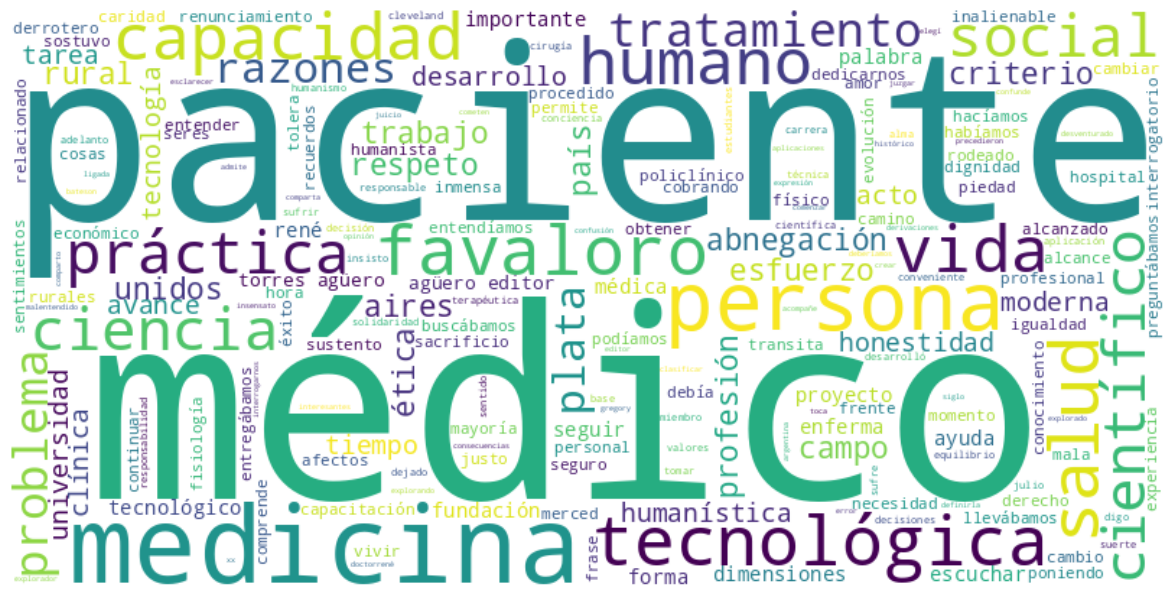

In [ ]:
from wordcloud import WordCloud  # Librería para generar nubes de palabras
import matplotlib.pyplot as plt  # Librería para visualización de gráficos

# Filtrar tokens: eliminar stop words, signos de puntuación, espacios y caracteres no alfabéticos
tokens_limpios = [token.text for token in doc if not token.is_stop and token.is_alpha]

# Unir los tokens en un solo string (separados por espacios) para alimentar la nube de palabras
texto_limpio = " ".join(tokens_limpios)

# Crear la nube de palabras
wordcloud = WordCloud(
    width=800,    # ancho de la imagen
    height=400,   # alto de la imagen
    background_color='white',   # color de fondo
    colormap='viridis').generate(texto_limpio)
    # paleta de colores
    # crea la nube de palabras, donde el tamaño de cada palabra depende de su frecuencia

# Mostrar la nube de palabras
plt.figure(figsize=(15, 7.5)) # tamaño del gráfico
plt.imshow(wordcloud, interpolation='bilinear') # dibuja la nube
plt.axis('off')  # oculta los ejes
plt.show()

<h1>2.3 Usando el texto que conseguiste en el punto 1).</h1>
<h3>2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.</h3>
<h3>2.3.2 Determina la longitud de tu vocabulario.<h/3>
<h3>2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario</h3>

In [9]:
### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.
### 2.3.2 Determina la longitud de tu vocabulario.
### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

import spacy  #se usa para procesar texto en español (tokenizar, segmentar oraciones, reconocer stop words).
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#CountVectorizer:convierte texto en una matriz documento–vocabulario (frecuencia de palabras).
#TfidfTransformer: convierte esa matriz de frecuencias en una matriz TF-IDF, que mide la importancia relativa de las palabras.

# Cargar modelo spaCy para español
nlp = spacy.load("es_core_news_sm")

def limpiar_preprocesar(texto):
    """
    Limpia el texto, lo procesa con spaCy, segmenta en oraciones,
    elimina stop words y tokens no alfabéticos.
    Devuelve lista de oraciones limpias.
    """
    doc = nlp(texto.lower()) # Procesa el texto en minúsculas
    oraciones_limpias = []
    for sent in doc.sents: #doc.sents recorre cada oración detectada por spaCy.
        tokens = [token.text for token in sent if not token.is_stop and token.is_alpha]
        # token.is_stop -> descarta stop words
        # token.is_alpha -> descarta números y símbolos
        # token.text → toma el texto de la palabra tal cual aparece
        oracion = " ".join(tokens).strip()
        #Une las palabras filtradas en una oración limpia.
        if oracion:
            oraciones_limpias.append(oracion)
            #Solo guarda la oración si no quedó vacía después del filtrado
    return oraciones_limpias

def crear_matriz_bow(oraciones_limpias):
    """
    Recibe lista de oraciones limpias, devuelve la matriz BoW y el vectorizador.
    """
    vectorizer = CountVectorizer()
    # CountVectorizer de scikit-learn se encarga de transformar texto en vectores de frecuencias
    matriz_bow = vectorizer.fit_transform(oraciones_limpias)
    # fit: aprende el vocabulario (palabras únicas) de la lista.
    # transform: construye la matriz de frecuencias.
    return matriz_bow, vectorizer

def longitud_vocabulario(vectorizer):
    """
    Recibe vectorizador y devuelve longitud del vocabulario.
    """
    return len(vectorizer.get_feature_names_out())


def aplicar_tfidf(matriz_bow):
    """
    Recibe matriz BoW, devuelve matriz TF-IDF (sparse).
    """
    tfidf_transformer = TfidfTransformer()
    matriz_tfidf = tfidf_transformer.fit_transform(matriz_bow)
    return matriz_tfidf


# 1. Limpiar y preprocesar
oraciones_limpias = limpiar_preprocesar(texto)
print(f"Cantidad de oraciones limpias: {len(oraciones_limpias)}")


# 2. Crear matriz documento-vocabulario
matriz_bow, vectorizer = crear_matriz_bow(oraciones_limpias)
print(f"Tamaño de la matriz documento-vocabulario: {matriz_bow.shape}")

# 3. Longitud del vocabulario
vocab_len = longitud_vocabulario(vectorizer)
print(f"Longitud del vocabulario: {vocab_len}")

# 4. Aplicar TF-IDF
matriz_tfidf = aplicar_tfidf(matriz_bow)
print(f"Tamaño de la matriz TF-IDF: {matriz_tfidf.shape}")

# Visualizar resultados
print("\n📝 Primeras 6 filas (oraciones) de la matriz TF-IDF:")
print(matriz_tfidf[:6].toarray())


Cantidad de oraciones limpias: 98
Tamaño de la matriz documento-vocabulario: (98, 582)
Longitud del vocabulario: 582
Tamaño de la matriz TF-IDF: (98, 582)

📝 Primeras 6 filas (oraciones) de la matriz TF-IDF:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21644616 0.         ... 0.         0.         0.        ]
 [0.         0.26697119 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]



# Anexo, código de ejemplo del uso de wordcloud

Instalar e importar la librería

In [ ]:
# instalar wordcloud
!pip install wordcloud


In [ ]:

# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


Mostramos la imagen generada

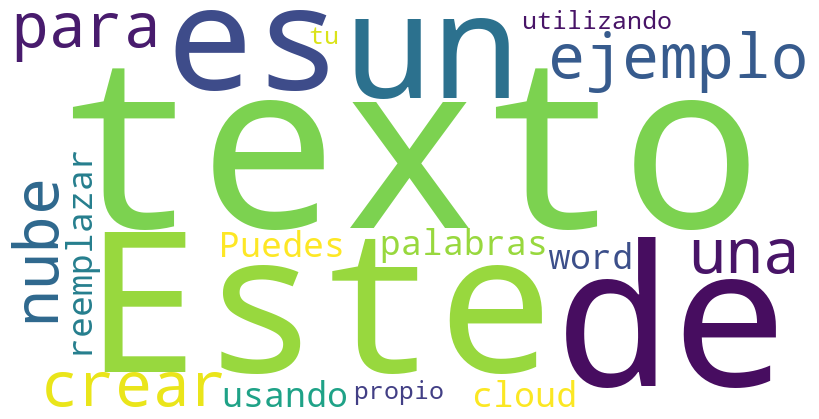

In [ ]:

# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Modificamos el ejemplo anterior agregando palabras en español que no queremos que considere para crear la nube de palabras. Estas son las stop_words



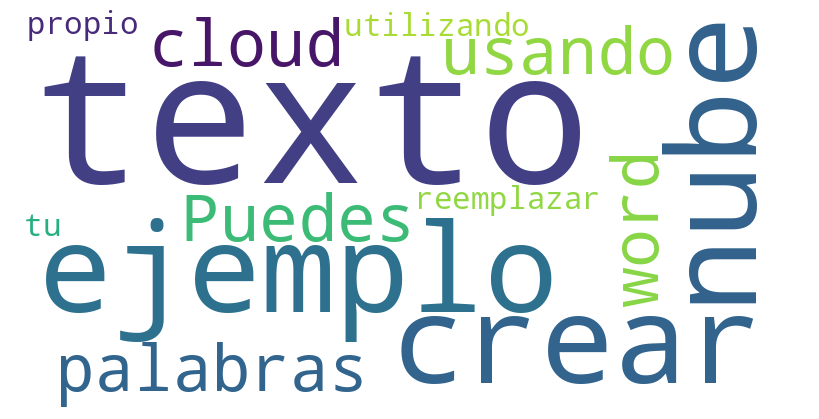

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Definir stopwords en español
stopwords_es = set(STOPWORDS)
stopwords_es.update(["con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])

# Crear un objeto WordCloud con stopwords en español
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords_es).generate(text)

# Mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
